In [2]:
cd c:\Users\rio_m\OneDrive - 国立大学法人東海国立大学機構\100knock\hlab2023-nlp100

c:\Users\rio_m\OneDrive - 国立大学法人東海国立大学機構\100knock\hlab2023-nlp100


In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [4]:
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [5]:
model.similarity("United_States","U.S.")

0.73107743

In [6]:
model.most_similar("United_States")

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

In [7]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])


[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [8]:
%pip install head

Note: you may need to restart the kernel to use updated packages.


In [9]:
count=0
with open('./questions-words.txt', 'r') as f1:
    for line in f1: 
        count+=1
        if count<11:
            print(line)
        else:
            f1.close()
            break


: capital-common-countries

Athens Greece Baghdad Iraq

Athens Greece Bangkok Thailand

Athens Greece Beijing China

Athens Greece Berlin Germany

Athens Greece Bern Switzerland

Athens Greece Cairo Egypt

Athens Greece Canberra Australia

Athens Greece Hanoi Vietnam

Athens Greece Havana Cuba



In [10]:
from tqdm import tqdm

with open('./questions-words.txt', 'r') as f1,open('./questions-words-write.txt', 'w') as f2:
    line_count = sum([1 for line in f1])
    f1.close()
    f2.close()

with open('./questions-words.txt', 'r') as f1,open('./questions-words-write.txt', 'w') as f2:

    for line in tqdm(f1,total=line_count):
        line = line.split()
        if line[0]==":":
            title=line[1]
        else:
            res=model.most_similar(positive=[line[1], line[2]], negative=[line[0]],topn=1)
            word=res[0][0]
            cosine=res[0][1]
            f2.write(" ".join([title]+line + [word,str(cosine)+"\n"]))
    f1.close()
    f2.close()
            

        



  0%|          | 0/19558 [00:00<?, ?it/s]

100%|██████████| 19558/19558 [40:25<00:00,  8.06it/s]


In [11]:
count=0
with open('./questions-words-write.txt', 'r') as f1:
    for line in f1: 
        count+=1
        if count<11:
            print(line)
        else:
            f1.close()
            break

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.635187029838562

capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878

capital-common-countries Athens Greece Beijing China China 0.7235778570175171

capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687

capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414

capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527808547019958

capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824

capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036

capital-common-countries Athens Greece Havana Cuba Cuba 0.6460990905761719

capital-common-countries Athens Greece Helsinki Finland Finland 0.68999844789505



In [15]:
with open("./questions-words-write.txt","r") as fp:
    all_mean=0
    cor_mean=0
    all_gram=0
    cor_gram=0
    for line in fp:
        line=line.split()
        if line[0].startswith("gram"):
            all_gram+=1
            if line[4]==line[5]:
                cor_gram+=1
        else:
            all_mean+=1
            if line[4]==line[5]:
                cor_mean+=1 
    
    print(f"意味的アナロジー:{cor_mean/all_mean:.3f}")
    print(f"文法的アナロジー:{cor_gram/all_gram:.3f}")

    fp.close()

意味的アナロジー:0.731
文法的アナロジー:0.740


In [16]:
count=0
with open('./combined.csv', 'r') as f1:
    for line in f1: 
        count+=1
        if count<11:
            print(line)
        else:
            f1.close()
            break

Word 1,Word 2,Human (mean)

love,sex,6.77

tiger,cat,7.35

tiger,tiger,10.00

book,paper,7.46

computer,keyboard,7.62

computer,internet,7.58

plane,car,5.77

train,car,6.31

telephone,communication,7.50



In [21]:
ws353=[]
with open("./combined.csv","r") as fp:
    next(fp)
    for line in fp:
        line=line.strip().split(",")
        line.append(model.similarity(line[0],line[1]))
        ws353.append(line)
    fp.close()

for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [24]:
import numpy as np
from scipy.stats import spearmanr

human=np.array(ws353).T[2]
vec=np.array(ws353).T[3]
correlation,pvalue=spearmanr(human,vec)

print(f"スピアマン相関係数：{correlation:.3f}")

スピアマン相関係数：0.685


In [30]:
countries=set()
with open("./questions-words-write.txt") as fp:
    for line in fp:
        line=line.split()
        if line[0].startswith("capital"):
            countries.add(line[2])
        elif line[0].startswith("currency") or line[0].startswith("gram6"):
            countries.add(line[1])
    fp.close()

countries=list(countries)

countries_vec=[model[i] for i in countries]

for i in countries_vec:
  print(i)

[ 0.02453613  0.17871094  0.19824219 -0.001091   -0.13867188 -0.03881836
  0.2421875  -0.22753906 -0.20507812 -0.24511719  0.05029297  0.11279297
  0.078125   -0.09423828  0.43554688  0.26953125 -0.10986328  0.05932617
 -0.03222656  0.10351562  0.15917969 -0.00531006  0.18554688 -0.21191406
  0.08984375  0.05029297  0.06738281 -0.14648438  0.26953125  0.04833984
 -0.25390625 -0.46679688 -0.33984375 -0.31054688 -0.08056641  0.11621094
 -0.26171875  0.13085938  0.09716797  0.0088501  -0.04785156  0.01080322
  0.07568359  0.08789062  0.0480957   0.18945312 -0.13378906  0.07128906
  0.26953125  0.38867188  0.13476562 -0.54296875 -0.44335938 -0.17285156
 -0.24414062 -0.03564453 -0.46484375  0.01342773 -0.30078125  0.18164062
  0.17773438  0.12890625  0.2890625   0.07421875 -0.01275635 -0.13085938
  0.33789062 -0.20800781  0.14941406  0.13085938 -0.1640625  -0.02587891
  0.296875    0.00213623 -0.02539062 -0.24316406  0.19433594  0.18652344
 -0.10498047  0.02600098 -0.28515625 -0.35546875 -0

In [37]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)

for i in range(5):
    cluster=np.where(kmeans.labels_==i)[0]
    print("cluster",i)
    print(",".join([countries[j] for j in cluster]))

cluster 0
Iran,Moldova,Turkey,Belarus,Poland,Macedonia,Armenia,Turkmenistan,Greece,Azerbaijan,Kazakhstan,Lithuania,Kyrgyzstan,Uzbekistan,Slovenia,Romania,Afghanistan,Jordan,Montenegro,Serbia,Croatia,Georgia,Hungary,Cyprus,Slovakia,Bulgaria,Iraq,Estonia,Israel,Latvia,Syria,Russia,Malta,Tajikistan,Ukraine,Lebanon,Albania
cluster 1
England,Belgium,Finland,Argentina,Denmark,Brazil,Sweden,Canada,Norway,Iceland,Greenland,Europe,Portugal,Samoa,France,Netherlands,Liechtenstein,Uruguay,Germany,Italy,USA,Spain,Austria,Switzerland,Ireland
cluster 2
Rwanda,Kenya,Gabon,Ghana,Madagascar,Sudan,Zambia,Uganda,Gambia,Burundi,Somalia,Malawi,Libya,Morocco,Liberia,Algeria,Guinea,Zimbabwe,Senegal,Nigeria,Angola,Mali,Eritrea,Egypt,Namibia,Botswana,Mozambique,Mauritania,Niger,Tunisia
cluster 3
Bahrain,Fiji,Japan,India,Thailand,Taiwan,Pakistan,Vietnam,China,Malaysia,Cambodia,Nepal,Laos,Indonesia,Philippines,Australia,Bhutan,Korea,Qatar,Oman,Bangladesh
cluster 4
Colombia,Venezuela,Tuvalu,Jamaica,Ecuador,Belize,

c:\Users\rio_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

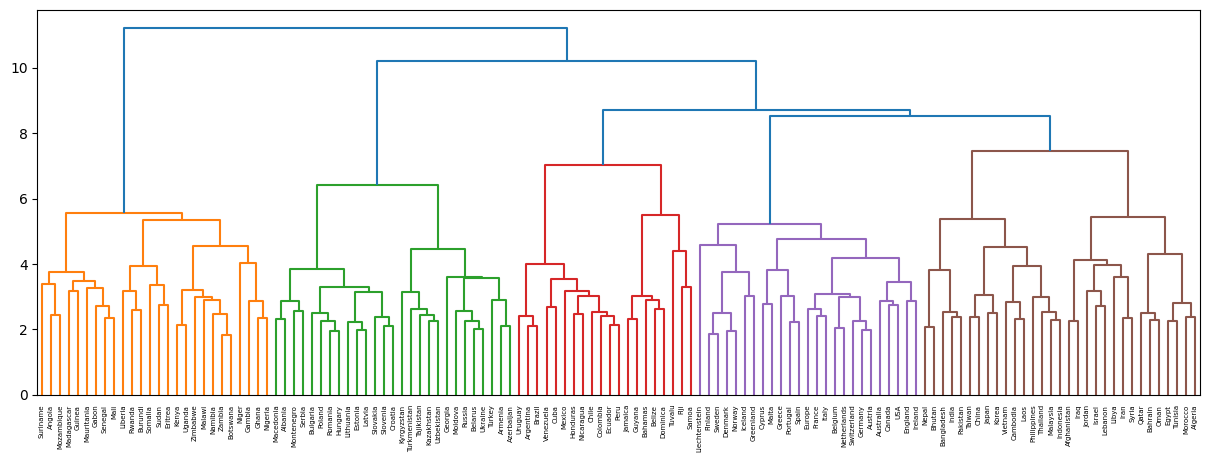

In [43]:
plt.figure(figsize=(15,5))
Z=linkage(countries_vec,method="ward")
dendrogram(Z,labels=countries)
plt.show()

In [44]:
%pip install bhtsne


                                              0.0/86.2 kB ? eta -:--:--
     ---------------------------------------- 86.2/86.2 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "c:\Users\rio_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\rio_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\rio_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\rio_m\AppData\Local\Temp\pip-build-env-9xhp0rus\

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()
